In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importation des données

In [41]:
df=pd.read_csv('fichier.csv')
df.head()
df = df[df.default_flag == 1]

C:\Users\romai\AppData\Local\Temp\ipykernel_23100\2533165777.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('fichier.csv')


## Partie Lise

In [42]:
dfl = df


## Partie Romain

In [43]:

dfr = df[["pl_name","hostname","default_flag","sy_snum","sy_pnum","rowid","pl_refname","pl_orbper","pl_orbsmax","pl_rade","pl_bmasse","pl_orbeccen"]]
dfr.rename(axis="columns", mapper={"pl_name":"nom","pl_orbper":"période_orbite","pl_orbsmax":"demi_grand_axe","pl_rade":"rayon","pl_bmasse":"masse","pl_orbeccen":"excentricité"},inplace=True)

C:\Users\romai\AppData\Local\Temp\ipykernel_23100\830225641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr.rename(axis="columns", mapper={"pl_name":"nom","pl_orbper":"période_orbite","pl_orbsmax":"demi_grand_axe","pl_rade":"rayon","pl_bmasse":"masse","pl_orbeccen":"excentricité"},inplace=True)


In [44]:
dfr.describe()

,default_flag,sy_snum,sy_pnum,rowid,période_orbite,demi_grand_axe,rayon,masse,excentricité
count,5535.0,5535.000000,5535.000000,5535.000000,5.287000e+03,3318.000000,4173.000000,2488.000000,2185.000000
mean,1.0,1.102078,1.770009,15493.401987,8.088392e+04,10.374148,4.271998,764.568608,0.156389
std,0.0,0.339360,1.146499,11858.577474,5.531259e+06,169.371181,4.743108,1418.769337,0.185088
min,1.0,1.000000,1.000000,3.000000,9.070629e-02,0.004400,0.310000,0.020000,0.000000
25%,1.0,1.000000,1.000000,3935.500000,4.460639e+00,0.055900,1.593000,14.987500,0.014000
50%,1.0,1.000000,1.000000,13756.000000,1.155562e+01,0.118900,2.380000,204.046350,0.091000
75%,1.0,1.000000,2.000000,26968.500000,4.139416e+01,0.850000,3.690000,742.133050,0.224000
max,1.0,4.000000,8.000000,35115.000000,4.020000e+08,7506.000000,77.342000,9534.900000,0.950000


Les données sont très dispersées (les écarts-types sont parfois un ordre de grandeur supérieur à la moyenne !), on va donc passer en échelle logarithmique pour les représenter, et ensuite prendre la partie entière.

In [53]:
dfr["demi_grand_axe_log"] = np.log10(dfr.demi_grand_axe)
dfr.demi_grand_axe_log = dfr.demi_grand_axe_log//1

dfr["période_orbite_log"] = np.log10(dfr.période_orbite)

C:\Users\romai\AppData\Local\Temp\ipykernel_23100\1542800402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr["demi_grand_axe_log"] = np.log10(dfr.demi_grand_axe)
C:\Users\romai\AppData\Local\Temp\ipykernel_23100\1542800402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr.demi_grand_axe_log = dfr.demi_grand_axe_log//1
C:\Users\romai\AppData\Local\Temp\ipykernel_23100\1542800402.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

### Demi grand axes des orbites des planètes

In [46]:
dfr.demi_grand_axe_log.value_counts()

demi_grand_axe_log
-2.0    1459
-1.0    1055
 0.0     677
 1.0      77
 2.0      28
-3.0      15
 3.0       7
Name: count, dtype: int64

<Axes: xlabel='demi grand axe (en unités astronomiques) en échelle logarithmique', ylabel='nombre de planètes'>

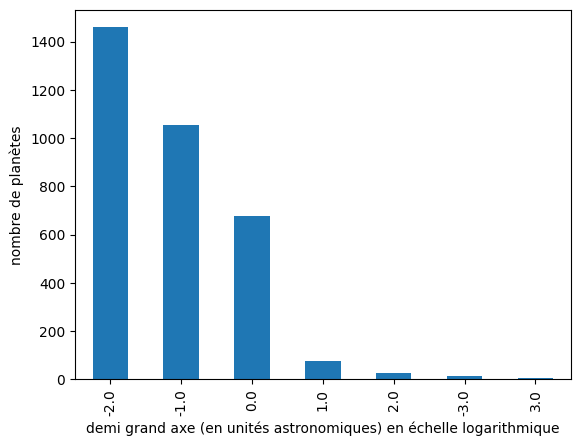

In [47]:
dfr.demi_grand_axe_log.value_counts().plot(kind = "bar",ylabel="nombre de planètes",xlabel="demi grand axe (en unités astronomiques) en échelle logarithmique")

In [48]:
dfr.describe()

,default_flag,sy_snum,sy_pnum,rowid,période_orbite,demi_grand_axe,rayon,masse,excentricité,demi_grand_axe_log
count,5535.0,5535.000000,5535.000000,5535.000000,5.287000e+03,3318.000000,4173.000000,2488.000000,2185.000000,3318.000000
mean,1.0,1.102078,1.770009,15493.401987,8.088392e+04,10.374148,4.271998,764.568608,0.156389,-1.164557
std,0.0,0.339360,1.146499,11858.577474,5.531259e+06,169.371181,4.743108,1418.769337,0.185088,0.915177
min,1.0,1.000000,1.000000,3.000000,9.070629e-02,0.004400,0.310000,0.020000,0.000000,-3.000000
25%,1.0,1.000000,1.000000,3935.500000,4.460639e+00,0.055900,1.593000,14.987500,0.014000,-2.000000
50%,1.0,1.000000,1.000000,13756.000000,1.155562e+01,0.118900,2.380000,204.046350,0.091000,-1.000000
75%,1.0,1.000000,2.000000,26968.500000,4.139416e+01,0.850000,3.690000,742.133050,0.224000,-1.000000
max,1.0,4.000000,8.000000,35115.000000,4.020000e+08,7506.000000,77.342000,9534.900000,0.950000,3.000000


## Partie Ombline

In [49]:
dfo = df


## Partie Camille

Analysons la répartition du nombre d'étoile par système solaire


<Axes: xlabel='sy_snum'>

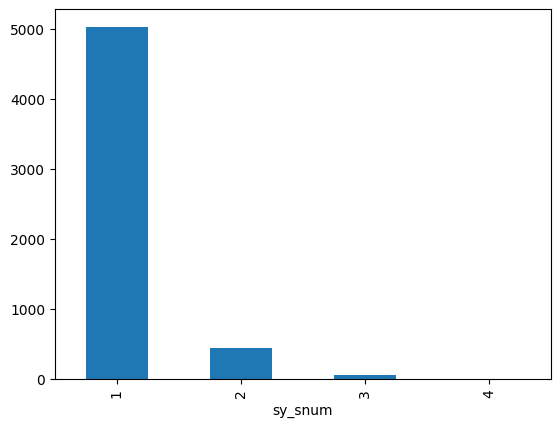

In [50]:
dfc = df
par_etoile=df.groupby(by='hostname')
dfc = df
dfc_entité=dfc[['pl_name', 'hostname', 'sy_snum', 'sy_pnum', ]]
print("Analysons la répartition du nombre d'étoile par système solaire")
dfc_entité.sy_snum.value_counts().plot(kind='bar')